In [1]:
%matplotlib inline

In [2]:
from utils import *

# Dataset

#### South African Heart Disease Dataset

https://web.stanford.edu/~hastie/ElemStatLearn/data.html

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

In [3]:
heart_disease_data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data')
heart_disease_data.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
# Use more user-friendly column names
columns = [
    'Patient ID',
    'Systolic Blood Pressure', 
    'Tobacco (kg)', 
    'LDL', 
    'Adiposity', 
    'Fam. Hist', 
    'Type A', 
    'Obesity', 
    'Alcohol', 
    'Age',
    'Coronary Heart Disease'
]

heart_disease_data.columns = columns
heart_disease_data.head(5)

,Patient ID,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Fam. Hist,Type A,Obesity,Alcohol,Age,Coronary Heart Disease
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# features
f1 = 'Age'
f2 = 'Systolic Blood Pressure'

# patient id
patient_id = 'Patient ID'

# target variable
target = 'Coronary Heart Disease'

Take a sample of 100 instances to form the training dataset

In [6]:
data = heart_disease_data.sample(100, random_state=43)[[patient_id, f1, f2, target]]
data[target] = data[target].apply(lambda x: False if not x else True)

In [7]:
data.sort_values(f2)

,Patient ID,Age,Systolic Blood Pressure,Coronary Heart Disease
20,21,20,106,True
179,180,56,108,False
440,442,32,110,False
166,167,55,110,True
67,68,27,112,False
...,...,...,...,...
229,230,50,188,True
314,316,50,190,False
407,409,60,200,True
403,405,58,208,True


# Train a first simple ML model

In [8]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(solver='lbfgs')

X = data[[f1, f2]]
y = data[target]
linear_model.fit(X.values, y)

LogisticRegression()

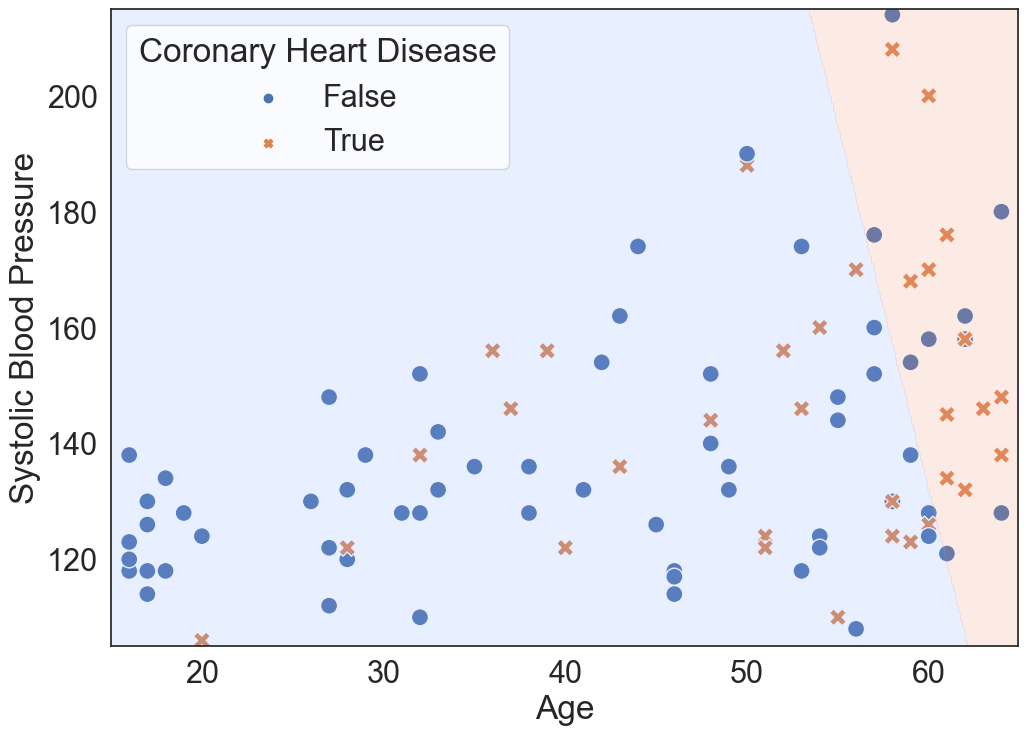

In [9]:
plot_data_and_decision_boundary(data, f1, f2, target, linear_model)

## Look at the parameters

In [10]:
# w
linear_model.coef_

array([[0.05469812, 0.00435669]])

In [11]:
# b
linear_model.intercept_

array([-3.85732665])

## Prediction on unseen cases

In [12]:
def logit(v): return 1 / (1 + np.exp(-v))

In [13]:
logit(linear_model.coef_.dot(np.array([62, 158])) + linear_model.intercept_)

array([0.55535078])

## Evaluation

For simplicity, we will evaluate the model on the training set, which is not a good indicator for future performance.
In the next week, we will talk about test sets and model selection.

In [14]:
y_pred = linear_model.predict(X.values)
y_pred

array([False, False, False,  True,  True, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False])

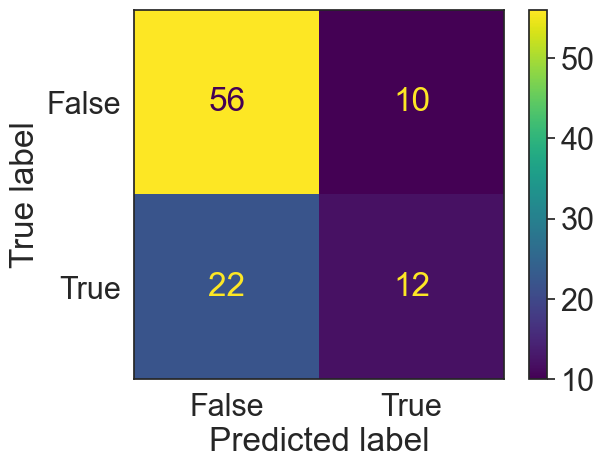

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y, y_pred)
confusion_matrix = display.confusion_matrix

In [16]:
tp = confusion_matrix[1,1]
fp = confusion_matrix[0,1]
fn = confusion_matrix[1,0]
tn = confusion_matrix[0,0]

### Accuracy

In [17]:
(tp + tn) / (fp + fn + tp + tn)

0.68

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.68

## Precision

In [19]:
tp / (tp + fp)

0.5454545454545454

In [20]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.5454545454545454

## Recall

In [21]:
tp / (tp + fn)

0.35294117647058826

In [22]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.35294117647058826

## F1 score

In [23]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
(2 * precision * recall) / (precision + recall)

0.42857142857142855

In [24]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.42857142857142855

## ROC Curve

In [25]:
from sklearn.metrics import RocCurveDisplay

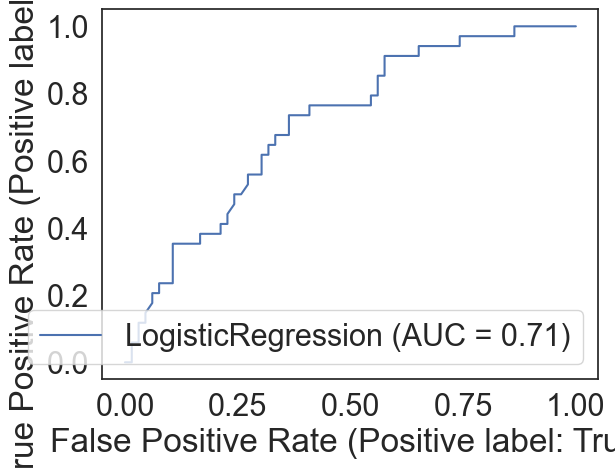

In [26]:
RocCurveDisplay.from_estimator(linear_model, X.values, y)